
### 1. CNN Biasa (Convolutional Neural Network)
- **Definisi**: CNN biasa adalah arsitektur jaringan saraf yang dirancang khusus untuk pemrosesan gambar. Jaringan ini belajar dari awal (from scratch) dengan menggunakan dataset yang besar.
- **Cara Kerja**:
  - CNN akan mengonvolusi gambar untuk mengekstrak fitur (seperti tepi, bentuk, dan pola).
  - Jaringan ini kemudian akan dilatih menggunakan banyak gambar agar dapat mengenali berbagai objek.
- **Manfaat**:
  - Dapat digunakan untuk tugas pengenalan gambar dari awal.
  - Memiliki fleksibilitas tinggi untuk aplikasi spesifik.

- **Kekurangan**:
  - Membutuhkan banyak data pelatihan dan waktu komputasi yang signifikan.
  - Tidak selalu efisien jika dataset kecil.

### 2. Transfer Learning
- **Definisi**: Transfer Learning adalah teknik di mana model yang sudah dilatih (biasanya pada dataset besar) digunakan sebagai titik awal untuk model baru pada tugas yang berbeda (biasanya dengan dataset yang lebih kecil).
- **Cara Kerja**:
  - Model yang sudah dilatih (seperti VGG, ResNet, atau Inception) diambil dan digunakan, biasanya dengan lapisan awal tetap tidak diubah.
  - Lapisan akhir model kemudian disesuaikan (dilatih ulang) untuk tugas spesifik Anda.
- **Manfaat**:
  - Menghemat waktu dan sumber daya pelatihan.
  - Dapat mencapai akurasi yang baik meskipun menggunakan dataset yang lebih kecil.

- **Kekurangan**:
  - Tidak semua model yang sudah dilatih cocok untuk setiap jenis data.
  - Model yang digunakan mungkin tidak optimal untuk tugas spesifik jika tidak disesuaikan dengan baik.

### 3. Fine Tuning
- **Definisi**: Fine Tuning adalah langkah lanjut dari Transfer Learning, di mana Anda tidak hanya melatih ulang lapisan akhir model tetapi juga beberapa lapisan sebelumnya.
- **Cara Kerja**:
  - Setelah model awal (pre-trained) digunakan, beberapa lapisan dari model tersebut dibebaskan (unfreeze) agar bisa dilatih ulang dengan dataset Anda.
  - Biasanya, lapisan yang lebih dalam (yang lebih spesifik untuk data) akan dilatih ulang, sementara lapisan awal tetap tidak berubah.
- **Manfaat**:
  - Dapat meningkatkan akurasi model dengan menyesuaikan fitur yang telah diekstrak agar lebih sesuai dengan data baru.
  - Memanfaatkan pengetahuan yang sudah ada untuk tugas baru dengan lebih efektif.

- **Kekurangan**:
  - Memerlukan pemahaman yang lebih baik tentang model dan data untuk menentukan lapisan mana yang harus dilatih ulang.
  - Bisa menyebabkan overfitting jika tidak dilakukan dengan hati-hati.

### Ringkasan Perbedaan

| **Aspek**              | **CNN Biasa**                       | **Transfer Learning**                | **Fine Tuning**                    |
|------------------------|-------------------------------------|--------------------------------------|------------------------------------|
| **Pelatihan**          | Dari awal (from scratch)           | Menggunakan model yang sudah dilatih | Menggunakan model yang sudah dilatih dan melatih beberapa lapisan |
| **Data yang Diperlukan** | Banyak data (biasanya)             | Data lebih sedikit                   | Data lebih sedikit                  |
| **Waktu Pelatihan**    | Lama (high)                         | Lebih cepat                          | Sedang                              |
| **Akurasi**            | Bergantung pada data yang ada      | Cenderung tinggi meskipun dengan data sedikit | Biasanya lebih tinggi dibanding Transfer Learning |
| **Fleksibilitas**      | Tinggi untuk aplikasi spesifik      | Cukup fleksibel                      | Memerlukan penyesuaian lebih lanjut |



# import

In [16]:

import numpy as np
import pathlib
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings("ignore")

# load data

In [3]:
data_file = tf.keras.utils.get_file(
  'flower_photos.tgz',
  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
  cache_dir='.',
   extract=True)

data_root = pathlib.Path(data_file).with_suffix('')



228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
data_bunga = '/content/datasets/flower_photos'

In [5]:
import os

# Memeriksa jumlah folder dalam dataset
print("Classes in dataset:")
print(os.listdir(data_bunga))

# Memeriksa jumlah gambar di setiap kelas
for class_name in os.listdir(data_bunga):
    class_path = os.path.join(data_bunga, class_name)
    if os.path.isdir(class_path):
        print(f"{class_name}: {len(os.listdir(class_path))} images")


Classes in dataset:
['daisy', 'roses', 'tulips', 'sunflowers', 'dandelion', 'LICENSE.txt']
daisy: 633 images
roses: 641 images
tulips: 799 images
sunflowers: 699 images
dandelion: 898 images


## preprocessing

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2

)
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    data_bunga,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    data_bunga,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1063: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [7]:
for images, labels in train_generator:
    print(images.shape)
    break

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


(32, 224, 224, 3)


# Transfer Learning

In [19]:
input_shape = (224, 224, 3)

inputs = Input(shape=input_shape)

base_model = MobileNetV2(input_shape=input_shape, 
                        include_top=False, 
                        weights='imagenet')

base_model.trainable = False

x = base_model(inputs)

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10
)

/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.5823 - loss: 1.1068 - val_accuracy: 0.7839 - val_loss: 0.5235
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7922 - loss: 0.5711 - val_accuracy: 0.8454 - val_loss: 0.4205
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.8234 - loss: 0.4653 - val_accuracy: 0.8564 - val_loss: 0.4118
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.8497 - loss: 0.4061 - val_accuracy: 0.8618 - val_loss: 0.3973
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.8705 - loss: 0.3591 - val_accuracy: 0.8741 - val_loss: 0.3873
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.8749 - loss: 0.3419 - val_accuracy: 0.8673 - val_loss: 0.4177
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.8979 - loss: 0.2829 - val_accuracy: 0.8673 - val_loss: 0.3953
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.8960 - loss: 0.2922 - val_accuracy: 0.8618 - val_loss: 0.

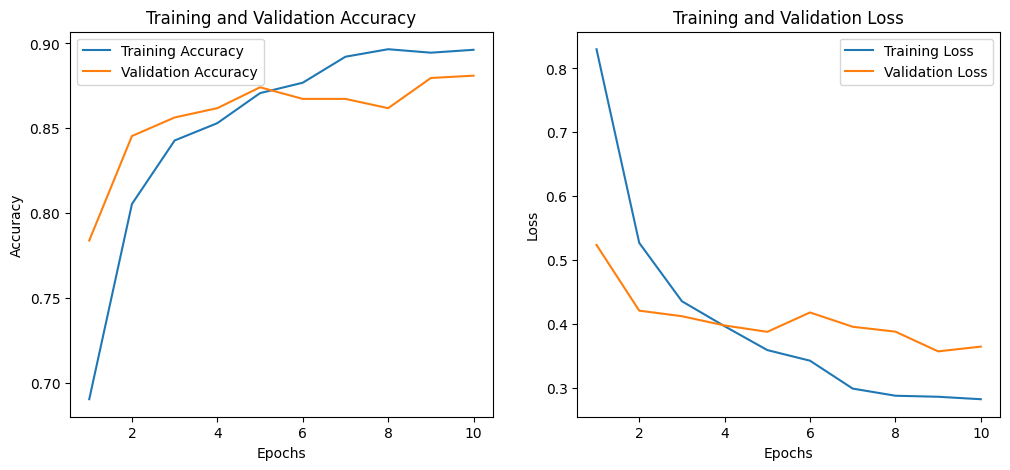

In [22]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# fine tuning

# Save model

In [25]:
model.save('flower_classification.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('flower_classification.h5')


# Testing